In [1]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.dataset import *
from fastai.learner import *
from fastai.metrics import *
from fastai.core import *
from fastai.model import *
from fastai.lm_rnn import *
from collections import *
from fastai.conv_learner import *
import matplotlib.pyplot as plt

In [2]:
#%env CUDA_LAUNCH_BLOCKING=1

In [3]:
normalize = torchvision.transforms.Normalize(
   mean=[28.95067, 28.9055 , 28.72874],
   std=[26.60848, 26.28552, 25.77563]
)

In [4]:
preprocess = torchvision.transforms.Compose([
   torchvision.transforms.Resize(256),
   torchvision.transforms.CenterCrop(240),
   torchvision.transforms.ToTensor(),
   #normalize
])

In [5]:
class PasswordDataset(Dataset):
    def __init__(self, files, ys):
        self.files = files
        self.ys = ys
        
    def __getitem__(self, idx):
        #print(self.files[idx], self.ys[idx])
        out = (preprocess(PIL.Image.open(self.files[idx]))/255).float().cuda()[:3], self.ys[idx].long().cuda()
        return out
        #return torch.Tensor(np.asarray(PIL.Image.open(self.files[idx]))/255).float().cuda()[:, :, :3],X
        
    
    def __len__(self): return len(self.ys)
    
    @classmethod
    def from_files(cls, img_path, y_path, cv_idxs):
        files = np.array(sorted(glob(img_path), key=lambda x: int(re.findall('\d+', x)[0])))

        ys = None
        
        with open(y_path) as f:
            raw = f.read().split("\n")
            ys = np.array([int(x) for x in raw if x != ''])
        
        mask = np.zeros(len(files), dtype='bool')
        print(len(files))
        mask[cv_idxs] = True
        val_where = list(mask)
        trn_where = list(~mask)

        #trn_where = ~mask
        return cls(files[trn_where], torch.Tensor(ys[trn_where])), cls(files[val_where], torch.tensor(ys[val_where]))


In [6]:
image_paths = "/home/robert/Documents/typingviewer/data/vidya/image-*.jpg"

In [7]:
y_path = "/home/robert/Documents/typingviewer/data/y2.csv"

In [12]:
dataset_size = len(glob(image_paths))

In [13]:
cv_idxs = get_cv_idxs(dataset_size, val_pct=0.1)

In [14]:
cv_idxs

array([1424,  111, 1841,  968,  415, 1780,   70,  530,  617, 1033, 1394,  949, 1085,  128,  367, 1894, 1214,
        730,  374, 1329,  275,  861, 1189, 1273,  212,  777,  135, 1465, 1653, 1265,  654,  857, 1538, 1497,
        231, 1283, 1304, 1289,  593, 1735,  585,  324,  366,  555, 1550, 1690,  414, 1364,   99, 1383, 1228,
       1026, 1435,  237,  289, 1083, 1745,  382,  806, 1477, 1658, 1073,  838, 1870,  297, 1261, 1862, 1313,
        677, 1347, 1475, 1268, 1895,   65, 1058, 1393, 1672,  916,   29,  610, 1677,  707, 1298, 1774,  572,
       1592,  331, 1568, 1562,  485, 1414,  413, 1762, 1284,  453,  438,  964, 1029, 1667,  694,  322, 1350,
       1680,  196,  936,  596,  120, 1374, 1611,  759,  109,  305, 1829, 1454, 1843,  755,  344,  427,  561,
       1133,  845, 1623, 1839, 1594, 1317,  613,  979, 1124,  788,  710,  611, 1331,  514, 1164,  251,  976,
       1898,  480,  527,  239, 1606, 1582,  932,  254, 1688, 1222, 1055, 1734, 1567,  518, 1211, 1433, 1425,
        700,   23, 

In [15]:
trn_ds, val_ds = PasswordDataset.from_files(image_paths, y_path, cv_idxs)

1908


In [16]:
Counter([x.item() for x in trn_ds.ys])

Counter({10.0: 204,
         2.0: 129,
         5.0: 158,
         1.0: 114,
         4.0: 192,
         7.0: 162,
         8.0: 217,
         0.0: 160,
         9.0: 145,
         6.0: 139,
         3.0: 98})

In [17]:
len(trn_ds)

1718

In [18]:
len(val_ds)

190

In [19]:
trn_ds[0]

(tensor(1.00000e-03 *
        [[[ 0.3537,  0.3537,  0.3537,  ...,  0.3537,  0.3537,  0.3537],
          [ 0.3537,  0.3537,  0.3537,  ...,  0.3537,  0.3537,  0.3537],
          [ 0.3537,  0.3537,  0.3537,  ...,  0.3537,  0.3537,  0.3537],
          ...,
          [ 0.3537,  0.3537,  0.3537,  ...,  0.3691,  0.3691,  0.3691],
          [ 0.3537,  0.3537,  0.3537,  ...,  0.3691,  0.3691,  0.3691],
          [ 0.3537,  0.3537,  0.3537,  ...,  0.3691,  0.3691,  0.3691]],
 
         [[ 0.3537,  0.3537,  0.3537,  ...,  0.3537,  0.3537,  0.3537],
          [ 0.3537,  0.3537,  0.3537,  ...,  0.3537,  0.3537,  0.3537],
          [ 0.3537,  0.3537,  0.3537,  ...,  0.3537,  0.3537,  0.3537],
          ...,
          [ 0.3537,  0.3537,  0.3537,  ...,  0.3691,  0.3691,  0.3691],
          [ 0.3537,  0.3537,  0.3537,  ...,  0.3691,  0.3691,  0.3691],
          [ 0.3537,  0.3537,  0.3537,  ...,  0.3691,  0.3691,  0.3691]],
 
         [[ 0.3537,  0.3537,  0.3537,  ...,  0.3537,  0.3537,  0.3537],
      

In [20]:
bs = 16

In [21]:
trn_dl = torch.utils.data.DataLoader(trn_ds, batch_size=bs)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=bs)

In [22]:
class ConvNet(nn.Module):
    def __init__(self, out_dim=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=3))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=3))
        self.fc = nn.Linear(26*26*32, out_dim)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        #print(out.size())
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [23]:
myConv = SingleModel(ConvNet().cuda())

In [24]:
md = ModelData('model', trn_dl, val_dl)

In [25]:
trn_ds[0][0].shape

torch.Size([3, 240, 240])

In [26]:
unsigned = np.array(np.clip(to_np(trn_ds[0][0]*256), 0, 255), dtype='uint8')

In [27]:
unsigned

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

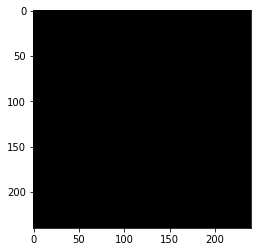

In [28]:
plt.imshow(np.moveaxis(unsigned, 0, 2))

In [29]:
myConv = SingleModel(ConvnetBuilder(resnet18, 200, False, False).model)

In [30]:
myConv.model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, ker

In [31]:
#myConv.model[:-1]

In [32]:
#learner = Learner(md, myConv, opt_fn=optim.Adam, crit=F.nll_loss)

In [33]:
#learner.fit(1*1e-3, 1)

In [34]:
class PasswordStatefulLSTM(nn.Module):
    def __init__(self, bs):
        super().__init__()
        
        self.cnn_final_width = 100
        self.number_rnn_layers = 1
        self.rnn_hidden_count = 20
        self.output_size = 11
        
        self.myConv = ConvNet(out_dim=11)
        
        self.convToLSTM = nn.Linear(115200, self.cnn_final_width)
        #self.convToLSTMBn = nn.BatchNorm1d(115200)
        
        self.flatten = Flatten()
        
        self.rnn = nn.LSTM(self.cnn_final_width, self.rnn_hidden_count, self.number_rnn_layers, dropout=0.2)
        self.l_out = nn.Linear(self.rnn_hidden_count, self.output_size)
        self.final_out = nn.Linear(self.cnn_final_width, self.output_size)
        self.init_hidden(bs)
        #self.conv = ConvNet(out_dim=self.cnn_final_width)
        self.conv = ConvnetBuilder(resnet18, 11, False, False).model#[:6]
        
    def forward(self, cs):
        #rnn_input = self.conv(cs).unsqueeze(1) #seq_len, batch, input_size
        #rnn_input = F.relu(self.convToLSTM(self.flatten(self.conv(cs))), inplace=True)
        #rnn_input = F.relu(rnn_input)
        #rnn_input = rnn_input.unsqueeze(1)
        
        #outp,h = self.rnn(rnn_input, self.h)
        #self.h = repackage_var(h)
        
        #------- wtf test
        #print(cs.shape)
        x = self.conv(cs)
        
        #print(x.shape)
        out = F.log_softmax(x, dim=-1)
        #print(out)
        return out
        
        
        #return F.log_softmax(self.l_out(outp), dim=-1).view(-1, self.output_size)
        #return F.log_softmax(self.final_out(rnn_input), dim=-1).view(-1, self.output_size)
        
    
    def init_hidden(self, bs):
        #self.h = (V(torch.zeros(self.number_rnn_layers, bs, self.rnn_hidden_count)),
        #          V(torch.zeros(self.number_rnn_layers, bs, self.rnn_hidden_count)))
        self.h = (V(torch.zeros(1, 1, self.rnn_hidden_count)),
                  V(torch.zeros(1, 1, self.rnn_hidden_count)))

In [35]:
myLSTM = SingleModel(PasswordStatefulLSTM(bs).cuda())

/home/robert/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [36]:
def faux_loss(preds, target):
    #print(preds, target)
    return F.nll_loss(preds, target)

In [42]:
learner = Learner(md, myLSTM, opt_fn=optim.SGD, crit=faux_loss)

In [43]:
#learner.lr_find()

In [44]:
#learner.sched.plot()

In [45]:
learner.fit(1e-2, 1, metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                     
    0      nan        nan        0.1       


[nan, 0.1]